In [1]:
# Cell 1: Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cell 2: Data Upload
raw_data_path = '..\\data\\heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(raw_data_path)

print(f'Dataset size: {df.shape}')
df.head()

Dataset size: (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
#Cell 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
# Cell 4 : Check null
df.isnull().sum()
df.isnull().mean() * 100

age                    0.0
sex                    0.0
chest pain type        0.0
resting bp s           0.0
cholesterol            0.0
fasting blood sugar    0.0
resting ecg            0.0
max heart rate         0.0
exercise angina        0.0
oldpeak                0.0
ST slope               0.0
target                 0.0
dtype: float64

In [6]:
# Cell 5
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [21]:
# Cell 6: Duplicate Rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [22]:
# Cell 7: 0 Number of Elements for Continuous Variables
total_rows = len(df)
zero_summary = {
    "Column": ["resting bp s", "cholesterol"],
    "Zero Count": [
        (df["resting bp s"]==0). sum() / total_rows * 100,
        (df["cholesterol"]==0). sum() / total_rows * 100,
    ]
}
zero_summary

{'Column': ['resting bp s', 'cholesterol'],
 'Zero Count': [np.float64(0.10893246187363835),
  np.float64(18.736383442265794)]}

In [23]:
# Cell 8
#Remove rows where "resting bp s" is 0
df = df[df["resting bp s"]!=0]
#Replace rows where "cholesterol" is 0 with the mean value
cholesterol_mean = df[df["cholesterol"]!=0]["cholesterol"].mean()
df["cholesterol"] = df["cholesterol"].replace(0, cholesterol_mean)

In [24]:
# Cell 9
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,3.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,1.635769,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.609555,0.497466
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [27]:
# Cell 10: Skewness for continuous column
continuous_columns = ["age", "resting bp s", "cholesterol", "oldpeak"]
df[continuous_columns].skew()

age            -0.195322
resting bp s    0.607195
cholesterol     1.372651
oldpeak         1.024545
dtype: float64

In [28]:
# Cell 11: Kurtosis for each column
df[continuous_columns].kurtosis()

age            -0.388986
resting bp s    0.791851
cholesterol     6.247752
oldpeak         1.203978
dtype: float64

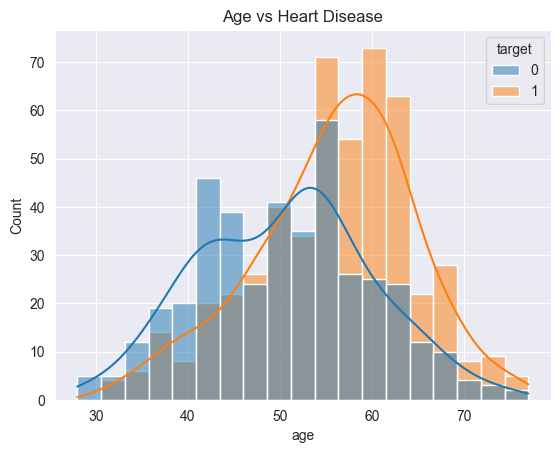

In [29]:
#Cell 12: Data Visualization
#Age-Target
sns.histplot(data=df, x="age", hue="target", kde=True)
plt.title("Age vs Heart Disease")
plt.show()

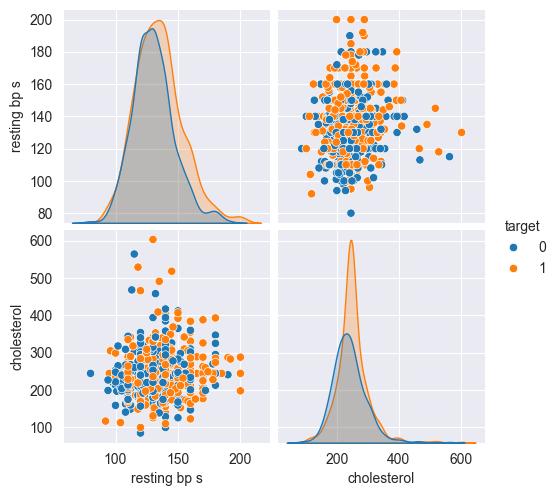

In [37]:
#Resting Blood Pressure - Cholesterol
sns.pairplot(data=df, vars=["resting bp s", "cholesterol"], hue="target")
plt.show()

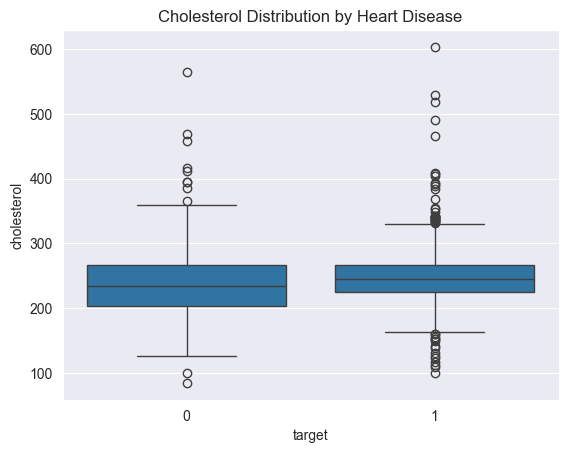

In [39]:
sns.boxplot(data=df, x="target", y="cholesterol")
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()

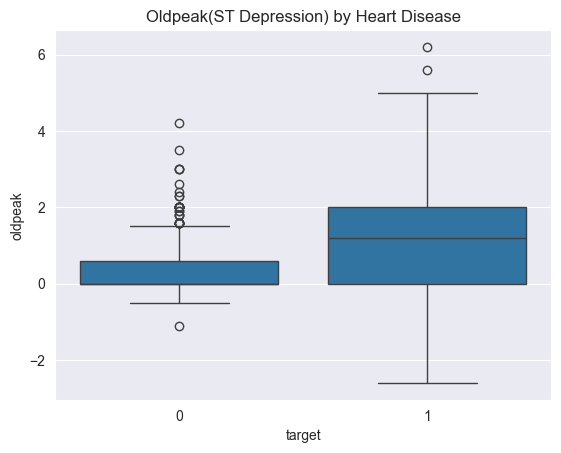

In [42]:
#ST depression - Heart Disease
sns.boxplot(data=df, x="target", y="oldpeak")
plt.title("Oldpeak(ST Depression) by Heart Disease")
plt.show()

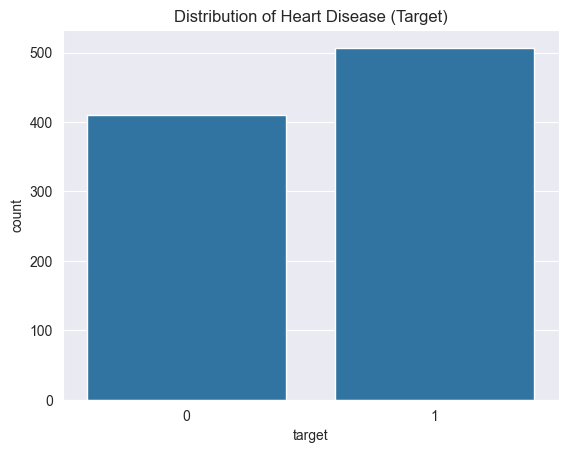

In [43]:
#Target variable distribution
sns.countplot(data=df, x="target")
plt.title("Distribution of Heart Disease (Target)")
plt.show()